# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:,:-1]#.values
y = dataset.iloc[:, -1]#.values

In [9]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [10]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [16]:
print(x_train)

    YearsExperience
27              9.6
11              4.0
17              5.3
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0


In [17]:
print(y_train)

27    112635.0
11     55794.0
17     83088.0
22    101302.0
5      56642.0
16     66029.0
8      64445.0
14     61111.0
23    113812.0
20     91738.0
1      46205.0
29    121872.0
6      60150.0
4      39891.0
18     81363.0
19     93940.0
9      57189.0
7      54445.0
25    105582.0
3      43525.0
0      39343.0
21     98273.0
15     67938.0
12     56957.0
Name: Salary, dtype: float64


In [18]:
print(x_test)

    YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7


In [19]:
print(y_test)

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64


## Training the Simple Linear Regression model on the Training set

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [21]:
y_predicted = regressor.predict(x_test)

df= pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df

,Actual,Predicted
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


## Visualising the Training set results

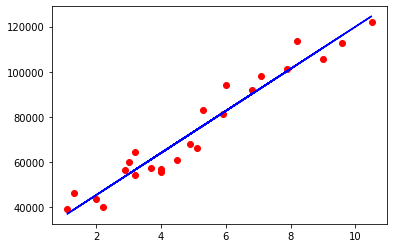

In [27]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

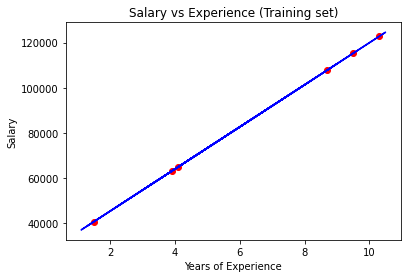

In [28]:
plt.scatter(x_test, y_predicted, color='red')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

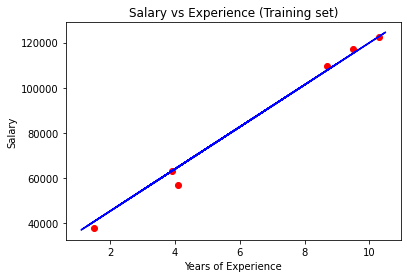

In [29]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#How to make single prediction

In [35]:
y_one = regressor.predict([[12]])
y_one

array([138531.00067138])

Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138531.00.

Important note: Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

12→scalar 

[12]→1D array 

[[12]]→2D array

In [46]:
arr=np.array([[12]])
print(arr)
print(arr.shape)

[[12]]
(1, 1)


##Getting the final linear regression equation with the values of the coefficients

In [36]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


Therefore, the equation of our simple linear regression model is:

**Salary=9312.58 ×YearsExperience+ 26780.099**


Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

###Finding Accuracy

In [47]:
acc = regressor.score(x_test, y_test)
acc

0.988169515729126